In [14]:
import pandas as pd
from os import path

%matplotlib inline


Validar con el ultimo archivo con edades que me ha enviado Karmele

In [15]:
doc_path = "/data/elekin/doc"
metadf=pd.read_csv(path.join(doc_path,"metadata-202106-v1.csv"),index_col=0)
metadf[metadf["temblor"]=='si']

,abs_path,relative_path,temblor,Sexo,TRS,age,level
name,,,,,,,
T001,/data/elekin/data/origin/ethw/protocolo_temblo...,T001/session00001/u00005s00001_hw00001.svc,si,M,36.0,74.0,2
T002_1,/data/elekin/data/origin/ethw/protocolo_temblo...,T002/session00001/u00006s00001_hw00002.svc,si,M,40.0,71.0,2
T002_2,/data/elekin/data/origin/ethw/protocolo_temblo...,T002/session00001/u00006s00001_hw00001.svc,si,M,40.0,71.0,2
T005,/data/elekin/data/origin/ethw/protocolo_temblo...,T005/session00001/u00009s00001_hw00001.svc,si,M,29.0,69.0,2
T006,/data/elekin/data/origin/ethw/protocolo_temblo...,T006/session00001/u00010s00001_hw00001.svc,si,F,19.0,77.0,2
T007,/data/elekin/data/origin/ethw/protocolo_temblo...,T007/session00001/u00012s00001_hw00002.svc,si,NaN,NaN,NaN,1
T008,/data/elekin/data/origin/ethw/protocolo_temblo...,T008/session00001/u00013s00001_hw00001.svc,si,F,3.0,68.0,1
T009,/data/elekin/data/origin/ethw/protocolo_temblo...,T009/session00001/u00014s00001_hw00001.svc,si,F,16.0,66.0,2
T010,/data/elekin/data/origin/ethw/protocolo_temblo...,T010/session00001/u00015s00001_hw00002.svc,si,M,16.0,61.0,2


In [16]:
labels = metadf.temblor.value_counts()
labels

no    29
si    24
Name: temblor, dtype: int64

CoG    29
LtG    12
HtG    12
Name: level, dtype: int64

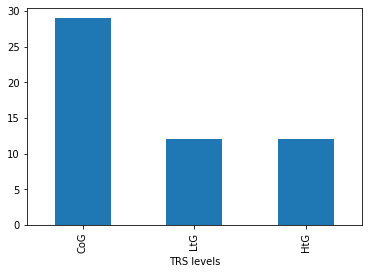

In [9]:
levels = metadf.level.value_counts()
levels.index = ["CoG", "LtG", "HtG"]
_=levels.plot.bar(xlabel="TRS levels")
levels

In [10]:
filename=metadf.abs_path.iloc[0]
#features=['x','y','timestamp','pen_up','azimuth','altitude','pressure']
features=['x','y','timestamp','pen_up','pressure']
data = pd.read_csv(filename, sep="\s+",header=None,names=features,skiprows=1,usecols=[0,1,2,3,6])

In [11]:
metadf.level.values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1,
       2, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 2, 1, 0, 2, 2, 2, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0])

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1980 entries, 0 to 1979
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   x          1980 non-null   int64
 1   y          1980 non-null   int64
 2   timestamp  1980 non-null   int64
 3   pen_up     1980 non-null   int64
 4   pressure   1980 non-null   int64
dtypes: int64(5)
memory usage: 77.5 KB


In [13]:
data

,x,y,timestamp,pen_up,pressure
0,5310,3728,1845198,1,238
1,5311,3726,1845206,1,320
2,5311,3726,1845213,1,302
3,5312,3725,1845221,1,260
4,5313,3725,1845228,1,244
...,...,...,...,...,...
1975,5404,4739,1860065,1,737
1976,5404,4739,1860072,0,0
1977,5404,4742,1860080,0,0
1978,5405,4740,1860087,0,0
